# Exercise: XGBoost

In this exercise, we'll be exploring XGBoost and leveraging it on the same regression and classification problem as `Exercise: Linear Models`. This is useful as when are you faced with a new challenge, you often try many different models to see how they each perform on your problem space. XGBoost can be tuned in many different ways, so we'll stick with some of the simpler defaults.

You're tasked with completing the following steps:
1. Load in the wine dataset from scikit learn.
2. For the wine dataset, create a train and test split, 80% train / 20% test.
3. Load the train/test data into the xgboost matrix
4. Create a XGBoost Classifier model with these hyper parameters:
    1. max_depth: 5
    2. eta: 0.1
    3. objective: multi:softmax
    4. num_class: 3
    5. num_round: 100
5. Evaluate the model with the test dataset
6. Output the feature importance of the wine dataset
7. Load the diabetes dataset from scikit learn
8. For the Diabetes dataset, create a train and test split, 80% train / 20% test.
9. Load the train/test data into the xgboost matrix
10. Create a XGBoost Regression model model with these hyper parameters:
    1. max_depth: 2
    2. eta: 0.03
    3. gamma: 0.09
    4. colsample_bytree: 0.5
    5. objective: reg:squarederror
    6. num_round: 100
11. Evaluate the model with the test dataset
12. Output the feature importance of the diabetes dataset

## Setup

### Open up Sagemaker Studio

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (Data Science)`

In [2]:
# xgboost is not preinstalled so we'll need to install it manually
!pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.9/255.9 MB 3.5 MB/s eta 0:00:0000:0100:01


In [69]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split
import xgboost as xgb
import matplotlib.pyplot as plt

## XGBoost Classifier

In [70]:
# Load in the wine dataset
wine = datasets.load_wine()

In [71]:
# Create the wine `data` dataset as a dataframe and name the columns with `feature_names`
df = pd.DataFrame(wine.data, columns=wine.feature_names)

# Include the target as well
df['target'] = wine.target

In [72]:
train_test_split

<function sklearn.model_selection._split.train_test_split(*arrays, **options)>

In [73]:
# Split your data with these ratios: train: 0.8 | test: 0.2
df_train, df_test = train_test_split(df, test_size=0.2, random_state=0)

In [74]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(df_train.drop(columns='target'), label=df_train.target)
dtest = xgb.DMatrix(df_test.drop(columns='target'), label=df_test.target)

In [79]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
param = {'max_depth': 5, 
         'eta': 0.1, 
         'objective': 'multi:softmax', 
         'num_class': 3}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [80]:
# xgboost is not scikit learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)
preds

array([0., 2., 1., 0., 1., 0., 0., 2., 1., 1., 2., 2., 0., 1., 2., 1., 0.,
       0., 2., 0., 1., 0., 0., 1., 1., 1., 1., 1., 1., 2., 0., 0., 1., 0.,
       0., 0.], dtype=float32)

In [81]:
# Accuracy score using scikit learn function for classification metric
accuracy_score(df_test.target, preds)

0.9444444444444444

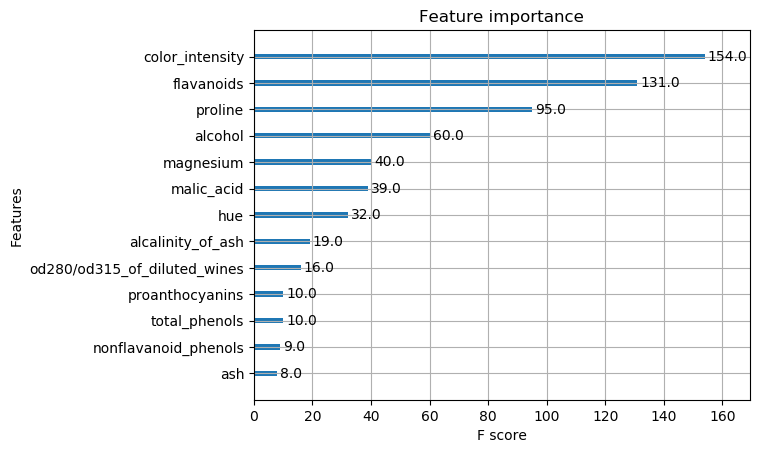

In [82]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)
plt.show()

## XGBoost Regression

In [88]:
# Load in the diabetes dataset
diabetes = datasets.load_diabetes()

In [89]:
# Create the diabetes `data` dataset as a dataframe and name the columns with `feature_names`
dfd = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

# Include the target as well
dfd['target'] = diabetes.target

In [90]:
# Split your data with these ratios: train: 0.8 | test: 0.2
dfd_train, dfd_test = train_test_split(dfd, test_size=0.2, random_state=0)

In [91]:
# Load your train/test dataframe into DMatrix
dtrain = xgb.DMatrix(dfd_train.drop(columns='target'), label=dfd_train.target)
dtest = xgb.DMatrix(dfd_test.drop(columns='target'), label=dfd_test.target)

In [94]:
# How does the model perform on the training dataset and default model parameters?
# Using the hyperparameters in the requirements, is there improvement?
# Remember we use the test dataset to score the model
param = {'max_depth': 2, 
         'eta': 0.03, 
         'gamma': 0.09, 
         'colsample_bytree': 0.5, 
         'objective': 'reg:squarederror'}
num_round = 100
bst = xgb.train(param, dtrain, num_round)

In [95]:
# xgboost is not scikit learn, so you'll need to do predictions using their API
preds = bst.predict(dtest)
preds

array([227.26164 , 218.61774 , 160.1792  , 109.79778 , 155.57991 ,
       235.7362  ,  93.75164 , 208.96854 , 131.67833 , 199.3957  ,
       162.81805 , 165.61063 , 111.80942 , 102.5946  , 260.1251  ,
        87.8861  , 130.38924 ,  81.62772 ,  94.01349 , 200.82417 ,
       170.30963 , 126.5396  , 172.89836 , 125.65285 , 191.1976  ,
       172.87479 , 112.8302  ,  85.033905, 180.40639 , 166.87628 ,
       167.83653 ,  88.757935,  98.71244 , 127.29004 , 148.00163 ,
       166.93611 , 141.04747 , 154.81802 ,  87.438156, 207.7718  ,
       107.63119 , 159.54735 , 140.28894 , 154.19406 , 168.3523  ,
        81.919014, 106.30834 , 127.18775 , 118.26471 , 231.34378 ,
       146.0947  ,  85.86675 , 143.81927 , 174.84464 , 218.16446 ,
       177.82603 , 190.44205 ,  90.313194, 118.7691  , 169.14781 ,
       204.17444 , 140.02391 , 141.37717 , 106.14103 , 210.86806 ,
       132.99673 ,  92.4572  , 210.92763 , 199.59062 ,  91.28062 ,
        81.71914 , 136.21298 , 111.774   , 133.42232 , 109.136

In [96]:
# R2 score using scikit learn function for regression metric
r2_score(dfd_test.target, preds)

0.3214960872257303

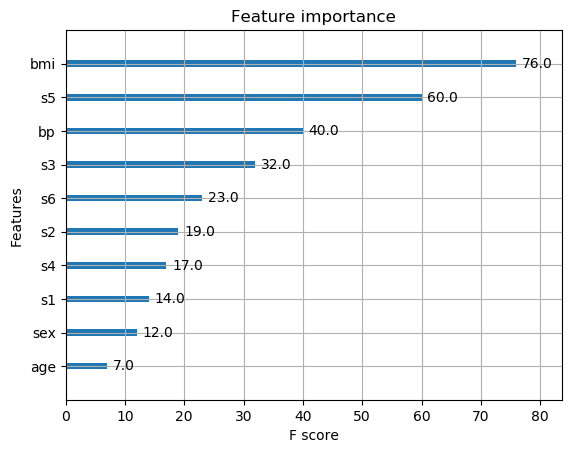

In [97]:
# Plot the importance of the features based on fitted trees
xgb.plot_importance(bst)
plt.show()